In [9]:
!pip install datasets

In [10]:
from datasets import load_dataset

In [22]:

from datasets import load_dataset

ds = load_dataset("gradio/NYC-Airbnb-Open-Data")

README.md:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

AB_NYC_2019.csv:   0%|          | 0.00/7.08M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/48895 [00:00<?, ? examples/s]

In [23]:
import pandas as pd
df = pd.DataFrame(ds['train'])
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,None,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [25]:
df.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [26]:
print(df.isnull().sum().sum())

20141


In [27]:
df.fillna(0,inplace=True)

In [28]:
print(df.isnull().sum().sum())

0


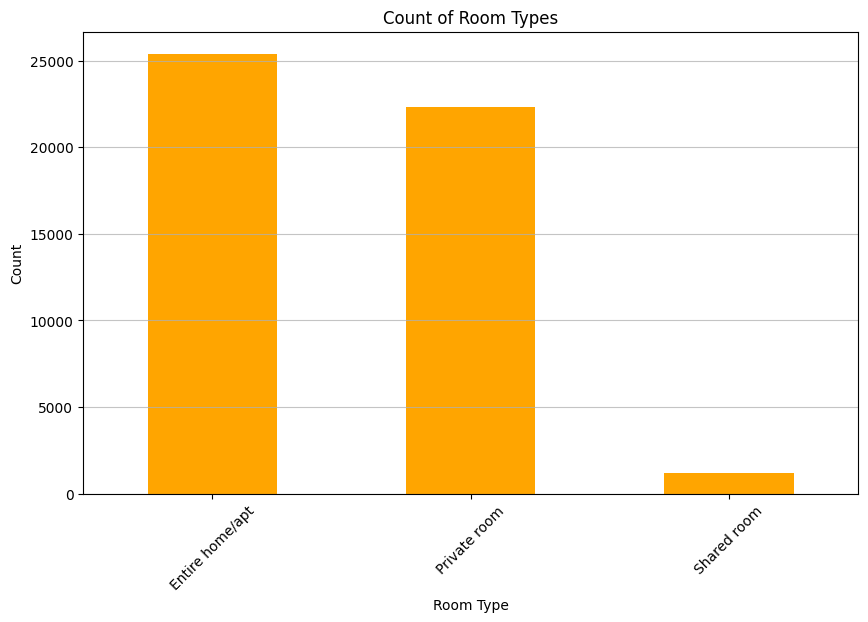

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df['room_type'].value_counts().plot(kind='bar', color='orange')
plt.title('Count of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()


In [40]:

df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Check the data type and some rows to confirm the conversion
print(df['last_review'].dtype)  # This should show 'datetime64[ns]'
print(df[['last_review']].head())  # Display the first few rows of 'last_review'


datetime64[ns]
  last_review
0  2018-10-19
1  2019-05-21
2         NaT
3  2019-07-05
4  2018-11-19


<ipython-input-41-fb402ea42d26>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reviews_per_month = df.resample('M', on='last_review').size()


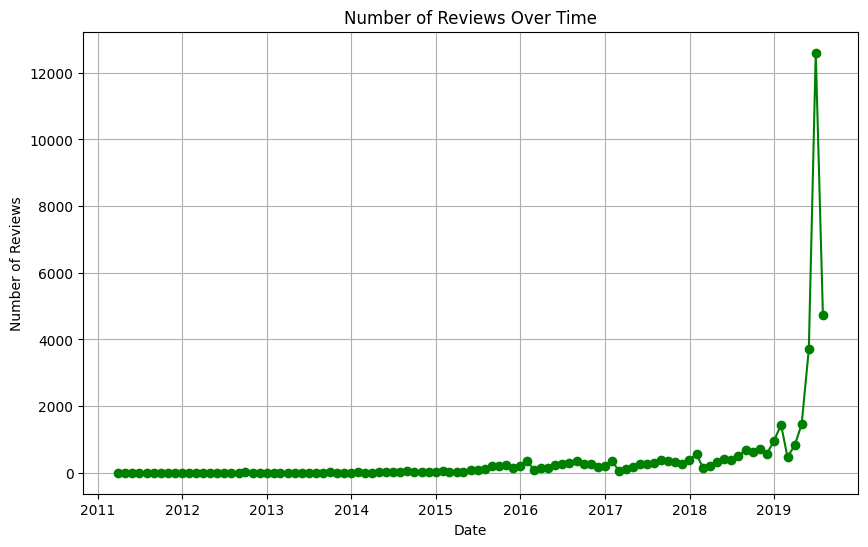

In [41]:
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

# Group by month and count reviews
reviews_per_month = df.resample('M', on='last_review').size()

plt.figure(figsize=(10, 6))
plt.plot(reviews_per_month.index, reviews_per_month.values, marker='o', color='green')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid()
plt.show()


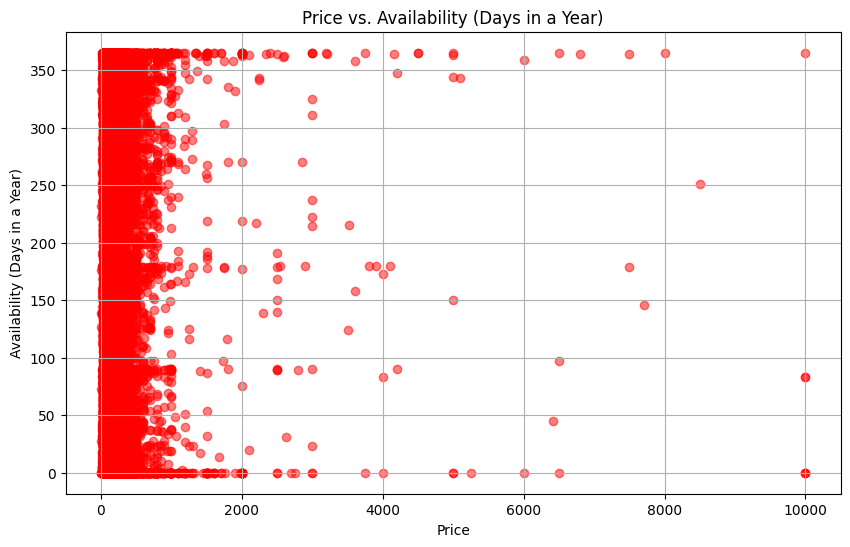

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['availability_365'], alpha=0.5, color='red')
plt.title('Price vs. Availability (Days in a Year)')
plt.xlabel('Price')
plt.ylabel('Availability (Days in a Year)')
plt.grid()
plt.show()


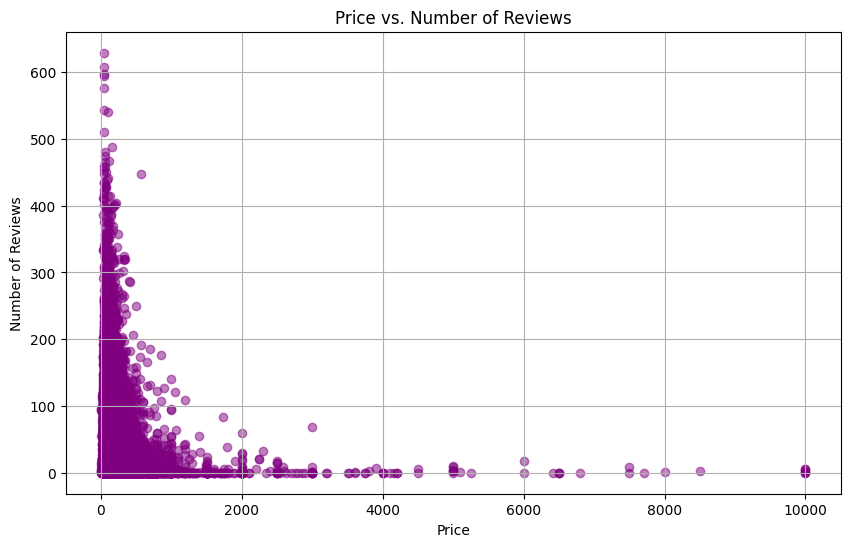

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['number_of_reviews'], alpha=0.5, color='purple')
plt.title('Price vs. Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.grid()
plt.show()
